<a href="https://colab.research.google.com/github/susanna-susanna/dau-stpy/blob/main/stpy_8_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/code/alxmamaev/how-to-easy-preprocess-russian-text/script

How to easy preprocess Russian text 🇷🇺

##[Домашнее задание к лекции "Статистика. Практика"](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/stat_case_study.ipynb)

###Задание 1
Вернемся к набору данных о видеоиграх.
https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?


Для каждого вопроса:

* сформулируйте нулевую и альтернативную гипотезы;

* выберите пороговый уровень статистической значимости;

* опишите полученные результаты статистического теста.






In [ ]:
import pandas as pd
import numpy as np  

from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

In [ ]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

In [ ]:
games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
games.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E




1) Как критики относятся к спортивным играм?


Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;

выберите пороговый уровень статистической значимости;

опишите полученные результаты статистического теста.

In [ ]:
games.loc[games.Genre == 'Sports'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 16715
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2348 non-null   object 
 1   Platform         2348 non-null   object 
 2   Year_of_Release  2306 non-null   float64
 3   Genre            2348 non-null   object 
 4   Publisher        2345 non-null   object 
 5   NA_Sales         2348 non-null   float64
 6   EU_Sales         2348 non-null   float64
 7   JP_Sales         2348 non-null   float64
 8   Other_Sales      2348 non-null   float64
 9   Global_Sales     2348 non-null   float64
 10  Critic_Score     1194 non-null   float64
 11  Critic_Count     1194 non-null   float64
 12  User_Score       1516 non-null   object 
 13  User_Count       1103 non-null   float64
 14  Developer        1526 non-null   object 
 15  Rating           1509 non-null   object 
dtypes: float64(9), object(7)
memory usage: 311.8+ KB


Получила 2348 строк, которые которые содеражат данные по играм жанра "Спорт".

Вижу, что не пустых строк 1194. Т.е. почти половину игр критики НЕ оценивали. 

Интересно, могу ли посчитать, что критикам не интересны спортивные игры?)) Что моральных и ментальных сил у критиков хватает оценить только  половину таких игр?))

Сейчас проверим

In [ ]:
games.loc[games.Genre != 'Sports'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14369 non-null  object 
 1   Platform         14371 non-null  object 
 2   Year_of_Release  14144 non-null  float64
 3   Genre            14369 non-null  object 
 4   Publisher        14320 non-null  object 
 5   NA_Sales         14371 non-null  float64
 6   EU_Sales         14371 non-null  float64
 7   JP_Sales         14371 non-null  float64
 8   Other_Sales      14371 non-null  float64
 9   Global_Sales     14371 non-null  float64
 10  Critic_Score     6943 non-null   float64
 11  Critic_Count     6943 non-null   float64
 12  User_Score       8499 non-null   object 
 13  User_Count       6487 non-null   float64
 14  Developer        8570 non-null   object 
 15  Rating           8441 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.9+ MB


Картина, наверное, даже немного хуже. Больше половины игр критики не оценивают.

---

Сформулируем Н0, которая звучит так: критики к спортивным играм относятся ровно так, как и ко всем остальным.

Н1 -- критики предпочитают или спортивный жанр, или другие жанры.

Уровень значимости примем за `0.05` ($\alpha=0.05$).

ttest_ind тестом посмотрим, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.

mannwhitneyu сравним медианы

In [ ]:
sport = games.loc[games.Genre == 'Sports']['Critic_Score']
not_sport = games.loc[games.Genre != 'Sports']['Critic_Score']

# можно дропнуть NaN-ы
# sport = games.loc[games.Genre == 'Sports']['Critic_Score'].dropna()
# not_sport = games.loc[games.Genre != 'Sports']['Critic_Score'].dropna()

# можно использовать nan_policy='omit' в stats.ttest_ind(sport, not_sport, equal_var=False)
# чтоб не удалять пустые значения

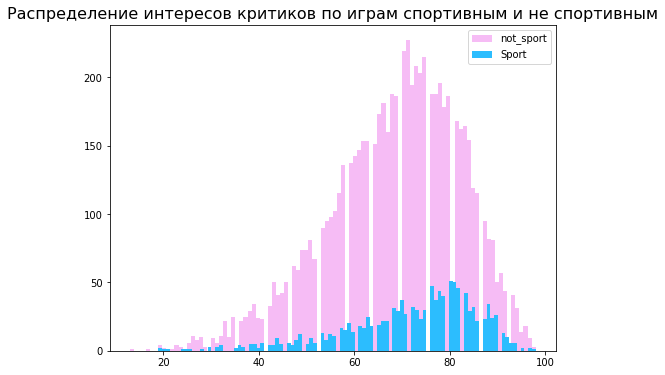

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(not_sport, bins=100, alpha=0.7, color=CB91_Pink, label='not_sport')
plt.hist(sport, bins=100, alpha=1, color=CB91_Blue, label='Sport')
plt.legend()
plt.title('Распределение интересов критиков по играм спортивным и не спортивным', size=16)
plt.show()

In [ ]:
t_1, p_value_1 = stats.ttest_ind(sport, not_sport, equal_var=False, nan_policy='omit')
print(t_1)
print(p_value_1)

if p_value_1 < 0.05:
  print("Наша Н0 -- не верна. Интерес критиков ко спортивным играм не такой же, как к другим")
else:
  print("Наша Н0 -- верна. Интерес критиков ко спортивным играм такой же, как к другим")

print("Средняя оценка критиков по спортивным играм: ", sport.mean())
print("Средняя оценка критиков по неспортивным играм: ", not_sport.mean())

8.08698828481822
1.1811713083203639e-15
Наша Н0 -- не верна. Интерес критиков ко спортивным играм не такой же, как к другим
Средняя оценка критиков по спортивным играм:  71.96817420435511
Средняя оценка критиков по неспортивным играм:  68.4516779490134


[Mann-Whitney-U-Test: Auswertung und Interpretation](https://statistikguru.de/spss/mann-whitney-u-test/auswertung-und-interpretation-2.html#:~:text=Ein%20signifikantes%20Ergebnis%20bedeutet%20beim,Gruppen%20von%20gewerkschaft%20von%20einander.)

In [ ]:
# без .dropna() выдает ошибку. Сатрая версия Питона для nan_policy='omit'
a = sport.dropna()
b = not_sport.dropna()
statistic_1, pvalue_1 = stats.mannwhitneyu(a, b)
print(statistic_1, pvalue_1)

if pvalue_1 < 0.05:
  print("Наша Н0 -- не верна. Интерес критиков ко спортивным играм не такой же, как к другим")
else:
  print("Наша Н0 -- верна. Интерес критиков ко спортивным играм такой же, как к другим")

print("Медиана критиков по спортивным играм: ", sport.median())
print("Медиана критиков по неспортивным играм: ", not_sport.median())

4839129.5 2.038377437021481e-20
Наша Н0 -- не верна. Интерес критиков ко спортивным играм не такой же, как к другим
Медиана критиков по спортивным играм:  75.0
Медиана критиков по неспортивным играм:  70.0


Как нужно понимать `t_1` и `statistic_1`?
Всё, что я поняла, эти цифры показывают на сколько наша гипотеза (? гипотеза ли) отклоняется от чего-то)) От чего? 

Пока я просто ориентируюсь только на значение `pvalue`, по которому определяю верна ли наша Н0 или нет. Возможно, мне и не нужны `t_1` и `statistic_1`, а возможно именно они показывают как именно не верна Н0? Конкретно в этой задаче я поняла, что интерес к спортивным играм отличен от интереса к другим играм. НО я не знаю, в позитивном или негативном смысле)) Спортивные игры критикам сильно нравятся по сравнению с другими играми или наоборот критики терпеть не могут спортивные игры? Пока я пользуюсь методом .mean(), чтоб понять это))

Я поняла, что `t-statistic` не нужно никак интерпретировать, она нам не нужна для выводов. Как раз на ее основе рассчитывается `p-value` (но она у нас и так уже есть!). 

И да, знак ее можно использовать, чтобы понимать, в какую сторону отклонения. Если он отрицательный, то среднее первой выборки меньше, если положительный - то больше (но никто не мешает для этих целей просто сравнивать фактические средние, как у сейчас и сделано)


2) Критикам нравятся больше игры на PC или на PS4?


* сформулируйте нулевую и альтернативную гипотезы;

* выберите пороговый уровень статистической значимости;

* опишите полученные результаты статистического теста.

Наша Н0 -- критикам равнозначно нравятся игры и на PC, и на PS4.

Наша Н1 -- критики преподчитают игры на одной из этих платформ больше.

Уровень значимости примем за `0.05` ($\alpha=0.05$).

ttest_ind тестом посмотрим, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.

mannwhitneyu сравним медианы

In [ ]:
games.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [ ]:
platforms = games[games.Platform.isin(['PC', 'PS4'])]

In [ ]:
platforms[['Platform', 'Critic_Count']].groupby('Platform').sum()

,Critic_Count
Platform,
PC,19963.0
PS4,9820.0


In [ ]:
platforms[['Platform', 'Critic_Score']].groupby('Platform').sum()

,Critic_Score
Platform,
PC,54289.0
PS4,18167.0


In [ ]:
pc = platforms.loc[platforms.Platform == 'PC']['Critic_Score']
ps4 = platforms.loc[platforms.Platform == 'PS4']['Critic_Score']

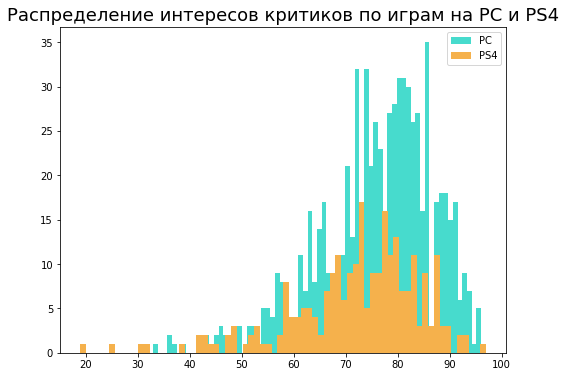

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(pc, bins=70, alpha=1, color=CB91_Green, label='PC')
plt.hist(ps4, bins=70, alpha=1, color=CB91_Amber, label='PS4')
plt.legend()
plt.title('Распределение интересов критиков по играм на PC и PS4', size=18)

plt.show()

In [ ]:
t_2, p_value_2 = stats.ttest_ind(pc, ps4, equal_var=False, nan_policy='omit')
print(t_2)
print(p_value_2)

if p_value_2 < 0.05:
  print("Наша Н0 -- не верна; критики преподчитают игры на одной из этих платформ больше.")
else:
  print("Наша Н0 -- верна; критикам равнозначно нравятся игры и на PC, и на PS4.")

print("Средняя оценка критиков PC: ", pc.mean())
print("Средняя оценка критиков PS4: ", ps4.mean())

4.3087588262138725
2.0672491572827482e-05
Наша Н0 -- не верна; критики преподчитают игры на одной из этих платформ больше.
Средняя оценка критиков PC:  75.92867132867133
Средняя оценка критиков PS4:  72.09126984126983


In [ ]:
# без .dropna() выдает ошибку. Сатрая версия Питона для nan_policy='omit'
c = pc.dropna()
d = ps4.dropna()
statistic_2, pvalue_2 = stats.mannwhitneyu(c, d)
print(statistic_2, pvalue_2)

if pvalue_2 < 0.05:
  print("Наша Н0 -- не верна; критики преподчитают игры на одной из этих платформ больше.")
else:
  print("Наша Н0 -- верна; критикам равнозначно нравятся игры и на PC, и на PS4.")

print("Медиана критиков PC: ", pc.median())
print("Медиана критиков PS4: ", ps4.median())

106906.5 1.0200797553427417e-05
Наша Н0 -- не верна; критики преподчитают игры на одной из этих платформ больше.
Медиана критиков PC:  78.0
Медиана критиков PS4:  73.0


3) Критикам больше нравятся стрелялки или стратегии?


Для каждого вопроса:

* сформулируйте нулевую и альтернативную гипотезы;

* выберите пороговый уровень статистической значимости;

* опишите полученные результаты статистического теста.

In [ ]:
games.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Наша Н0 -- критикам равнозначно нравятся игры: и стрелялки, и стратегии.

Наша Н1 -- критики преподчитают игры на одной из этих платформ больше.

Уровень значимости примем за 0.05 ( 𝛼=0.05 ).

ttest_ind тестом посмотрим, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.

mannwhitneyu сравним медианы

In [ ]:
shooter = games.loc[games.Genre == 'Shooter']['Critic_Score']
strategy = games.loc[games.Genre == 'Strategy']['Critic_Score']

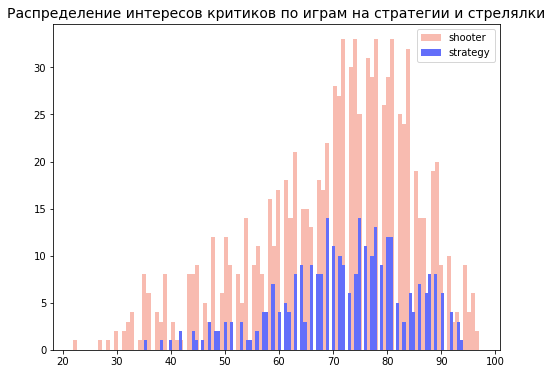

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(shooter, bins=100, alpha=0.4, color='#EF553B', label='shooter')
plt.hist(strategy, bins=100, alpha=1, color='#636EFA', label='strategy')
plt.legend()
plt.title('Распределение интересов критиков по играм на стратегии и стрелялки', size=14)

plt.show()

In [ ]:
t_3, p_value_3 = stats.ttest_ind(shooter, strategy, equal_var=False, nan_policy='omit')
print(t_3)
print(p_value_3)

if p_value_3 < 0.05:
  print("Наша Н0 -- не верна; критики преподчитают что-то одно")
else:
  print("Наша Н0 -- верна; критикам равнозначно нравятся игры: и стрелялки, и стратегии")

print("Средняя оценка критиков стрелялки: ", shooter.mean())
print("Средняя оценка критиков стратегии: ", strategy.mean())

-2.2972408230640315
0.021938989522305212
Наша Н0 -- не верна; критики преподчитают что-то одно
Средняя оценка критиков стрелялки:  70.18114406779661
Средняя оценка критиков стратегии:  72.08609271523179


In [ ]:
# без .dropna() выдает ошибку. Сатрая версия Питона для nan_policy='omit'
e = shooter.dropna()
f = strategy.dropna()
statistic_3, pvalue_3 = stats.mannwhitneyu(e, f)
print(statistic_3, pvalue_3)

if pvalue_3 < 0.05:
  print("Наша Н0 -- не верна;  критики преподчитают что-то одно")
else:
  print("Наша Н0 -- верна; критикам равнозначно нравятся игры: и стрелялки, и стратегии")

print("Медиана критиков по стрелялкам: ", shooter.median())
print("Медиана критиков по стратегиям: ", strategy.median())

136251.5 0.2475396209469165
Наша Н0 -- верна; ккритикам равнозначно нравятся игры: и стрелялки, и стратегии
Медиана критиков по стрелялкам:  73.0
Медиана критиков по стратегиям:  73.0


Итого

У меня в одном тесте задачи 1.3 получилось, что критикам больше нравятся стратегии; в другом получилось, что критикам что стратегии, что стрелялки нравятся в равной степени.

Или любовь критиков к стратегиям не так велика, что можно однозначно и уверенно об этом сказать.

Или я намудрила с тестами и вообще неправильно решила все три задачи этого задания))


colors

https://plotly.com/python/discrete-color/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

###Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:
```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```
Можете поэкспериментировать с параметрами TfidfVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте train_test_split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html;

7) Постройте модель логистической регрессии https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html, укажите `random_state=42`, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного). 

In [ ]:
datas = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
datas.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


Я чуть инфаркт не получила, пытаясь прочесть csvфайл по адресу https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv и роясь по всему интеренету, пытаясь исправить ошибки, которые мне выбрасывает)) Пока не додумалась нажать на кнопочку raw http://joxi.ru/zAN3NV7T1DXWEr

Наверное, для особо одаренных, как я, нужно сразу адрес давать, который можно прописать в `pd.read_csv("")` или прописывать, где его взять))) 

Подскажите, пожалуйста, а что значит кнопочка Blame

In [ ]:
datas.Message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
datas.Category

In [ ]:
# приведем все слова к нижнему регистру
texts_lower_case = [text.lower() for text in datas.Message]
# проверим
texts_lower_case[:5]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though"]

In [ ]:
# уберем все служебные символы

import re

print(len(texts_lower_case[0]))
only_words_text = [re.sub('[\W_]+', ' ', text) for text in texts_lower_case]
# проверим
print(len(only_words_text[0]))
only_words_text[:5]

111
103


['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ',
 'ok lar joking wif u oni ',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say ',
 'nah i don t think he goes to usf he lives around here though']

In [ ]:
# разделим все на слова
texts_splitted = [text.split() for text in only_words_text]
# сколько слов?
len(texts_splitted[0])

20

In [ ]:
# удалим стоп-слова
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]
len(without_sw[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


16

In [ ]:
without_sw[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [ ]:
# Произведем лемматизацию
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')


wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text[0]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

[сделать вот тaкое прикольное облако слов](https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners/notebook)

исправить вот эту строку `collocations=False).generate(" ".join(data_pos))` 
https://ru.stackoverflow.com/questions/705066/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B0-typeerror-sequence-item-0-expected-str-instance-int-found

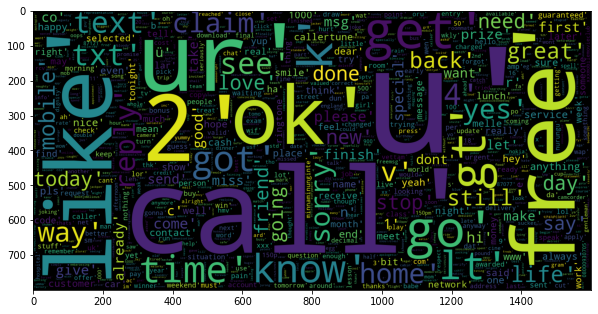

In [ ]:
from wordcloud import WordCloud

data_word = lemmatized_text[:300]
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(x) for x in data_word))
plt.imshow(wc)

In [ ]:
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
# библиотека gensim позволяет эффективно работать с корпусами текстов
from gensim import corpora

# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(lemmatized_text)
dict(dictionary)

https://tutorial.eyehunts.com/python/slicing-dictionary-python-example-code/

In [ ]:
len(dict(dictionary))

8082

In [ ]:
# Создадим на основе словаря модель bag of words, которая присваивает каждому слову (id) количество его вхождений в конкретном документе
bows = [dictionary.doc2bow(text) for text in lemmatized_text]
bows[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

Создадим модель [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF) (term frequency-inverse document frequency – частотность терминов-обратная частотность документов)

Если слово встречается в каком-либо документе часто, при этом встречаясь редко во всех остальных документах — это слово имеет большую значимость для исходного документа.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(datas.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Теперь каждый наш текст представлен по-сути вектором чисел. Сходство между ними мы можем определить при помощи косинусного сходства между соответствующими векторами.https://www.machinelearningplus.com/nlp/cosine-similarity/

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, datas.Category, test_size=0.3, random_state=42)

In [ ]:
# импортируем LR-функционал
from sklearn.linear_model import LogisticRegression

In [ ]:
# инициализирую класс
lr = LogisticRegression(random_state=42)

In [ ]:
# обучаем данные
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.74      0.84       224

    accuracy                           0.96      1672
   macro avg       0.97      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix

https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners/notebook

In [ ]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[1446,    2],
       [  59,  165]])

Text(0.5, 1.0, 'Confusion Matrix')

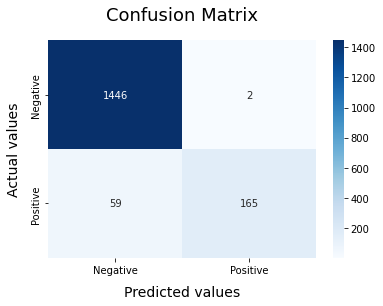

In [ ]:
# Compute and plot the Confusion matrix
lbs = ["ham", "spam"]
cfm = confusion_matrix(y_test, y_pred, labels=lbs)
categories  = ['Negative','Positive']

sns.heatmap(cfm, annot = True, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

[КАК ОЦЕНИТЬ СТОИМОСТЬ ПРОГНОЗА MACHINE LEARNING И НЕ ТОЛЬКО: СТРОИМ CONFUSION MATRIX](https://russianblogs.com/article/1607908719/)


[Матрица ошибок (Confusion Matrix)](https://www.helenkapatsa.ru/matritsa-oshibok/)


[Описание метода машинного обучения classification_report и точности, точности и отзыва](https://russianblogs.com/article/1607908719/)

In [ ]:
res = pd.DataFrame(data={'fact': y_test, 'pred': lr.predict(X_test)})
res.index = X_test.index
res = res[res.fact != res.pred]
res.join(datas[['Message']])

,fact,pred,Message
881,spam,ham,Reminder: You have not downloaded the content ...
1961,spam,ham,Guess what! Somebody you know secretly fancies...
3864,spam,ham,Oh my god! I've found your number again! I'm s...
2575,spam,ham,Your next amazing xxx PICSFREE1 video will be ...
3548,spam,ham,Rock yr chik. Get 100's of filthy films &XXX p...
...,...,...,...
191,spam,ham,Are you unique enough? Find out from 30th Augu...
4543,spam,ham,FreeMsg Hi baby wow just got a new cam moby. W...
752,spam,ham,You have an important customer service announc...
495,ham,spam,Are you free now?can i call now?


##Итого
Моя модель ошиблась в 61 случаях: 59 + 2.
Строк в датафрейме получили столько же

[Про ограничения МУ-теста](https://www.geeksforgeeks.org/mann-and-whitney-u-test/), в данном случае адекватнее применять именно критерий Стьюдента.



Для дальнейшего развития очень желательно изучить, как можно настраивать параметры модели , чтобы результаты были лучше. Для начала можно почитать вот эту статью: https://medium.com/@annabiancajones/sentiment-analysis-on-reviews-feature-extraction-and-logistic-regression-43a29635cc81

В т.ч. можно оптимизировать модель под другую метрику качества (а не accuracy) при помощи функций GridSearchCV или RandomizedSearchCV, чтобы достигать цели уменьшения именно тех ошибок, которые она совершает больше всего.

Библиотека nltk со скриншота без проблем работает с русским текстом (вместо english нужно указать russian), вот пример: https://habr.com/ru/post/517410/ Если же вопрос именно в лемматизации, то для русского есть специализированные библиотеки, например PyMystem3 и PyMoprhy, сравнить можно в этой статье: https://habr.com/ru/post/503420/

[Find element's index in pandas Series](https://stackoverflow.com/questions/18327624/find-elements-index-in-pandas-series)

[Python's map(): Processing Iterables Without a Loo](https://realpython.com/python-map-function/)

[Удалить строки в DataFrame удовлетворяющие условию](https://ru.stackoverflow.com/questions/786730/%D0%A3%D0%B4%D0%B0%D0%BB%D0%B8%D1%82%D1%8C-%D1%81%D1%82%D1%80%D0%BE%D0%BA%D0%B8-%D0%B2-dataframe-%D1%83%D0%B4%D0%BE%D0%B2%D0%BB%D0%B5%D1%82%D0%B2%D0%BE%D1%80%D1%8F%D1%8E%D1%89%D0%B8%D0%B5-%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8E)

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[Colab 1 с занятия case_study_books_recommend_1](https://colab.research.google.com/drive/1AciFU_8FXcZnhvLc3kOJR3yBYGuAiGjp#scrollTo=_a2CCSlM4_r-)

[Colab 2 с занятия case_study_bs_conf_int](https://colab.research.google.com/drive/1HsY8x0Fnd8JatiWCnaeBYV1DWBcq9AJS)

[Colab 3 с занятия case_study_linreg_confidence_interval](https://colab.research.google.com/drive/1mz8016TCIAFNrrBu7TewMuNllYtdE8HJ#scrollTo=mVjyjIyg5z5B)

[pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

[Дoбавить столбец из списка](https://uproger.com/dobavlyaem-novyj-stolbecz-v-sushhestvuyushhij-dataframe-v-pandas/)


[pandas.DataFrame.drop_Drop specified labels from rows or columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)


[КАК ОЦЕНИТЬ СТОИМОСТЬ ПРОГНОЗА MACHINE LEARNING И НЕ ТОЛЬКО: СТРОИМ CONFUSION MATRIX](https://russianblogs.com/article/1607908719/)


[Матрица ошибок (Confusion Matrix)](https://www.helenkapatsa.ru/matritsa-oshibok/)


[Описание метода машинного обучения classification_report и точности, точности и отзыва](https://russianblogs.com/article/1607908719/)

[Машинное обучение с использованием Python. Сборник рецептов: Пер. с англ.]

https://books.google.de/books?id=kdUHEAAAQBAJ&pg=PA114&lpg=PA114&dq=nltk.download(%27stopwords%27)+russian&source=bl&ots=IVHLZCAjg_&sig=ACfU3U0JhIUcSVb_tqBPsfHbd9Ph2ql8WA&hl=ru&sa=X&ved=2ahUKEwiw54rNoZb6AhWXraQKHRMCCTQQ6AF6BAgrEAM#v=onepage&q=nltk.download('stopwords')%20russian&f=false

In [ ]:
datas_miss['pred'].value_counts(normalize=True)


ham     0.90012
spam    0.09988
Name: pred, dtype: float64